In [1]:
from BR.model.hots import *
from BR.Feature_Extraction.build_features import *

C:\Users\sasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\sasin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of Tens

In [2]:
pip install tensorflow_addons

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_ENABLE_ONEDNN_OPTS"]="0"

In [3]:
# define input feature
prot_vec = "Sequence"
drug_vec = "Morgan"
drug_len = 2048
radius = 2
protein_encoder = ProteinEncoder(prot_vec)
compound_encoder = CompoundEncoder(drug_vec, radius=radius, n_bits=drug_len)

In [4]:
# initialize model
br_model = HoTS()

Hots model initialization done!


In [5]:
# load model
br_model.load_model("./Model/Model_config.json")

Given hyperparamters in ./Model/Model_config.json are loaded

protein_grid_size   :  10
compound_grid_size  :  None
anchors             :  [9]
hots_dimension      :  128
hots_n_heads        :  4
dropout             :  0.1
drug_layers         :  [512, 128]
protein_strides     :  [5, 10, 15, 20, 25, 30]
filters             :  128
fc_layers           :  [256, 64]
hots_fc_layers      :  [256, 64]
learning_rate       :  0.0001
prot_vec            :  Sequence
drug_vec            :  Morgan
drug_len            :  2048
activation          :  gelu
protein_layers      :  [128, 128, 128, 128]
reg_loss_weight     :  0.1
conf_loss_weight    :  1
negative_loss_weight:  0.1
retina_loss_weight  :  2
decay               :  0.0001
hots_file           :  ./Model/HoTS.h5
dti_file            :  ./Model/DTI.h5
hots_validation_results:  {}
dti_validation_results:  {}
n_stack_hots_prediction:  2
protein_encoder_config:  {'feature': 'Sequence'}
compound_encoder_config:  {'radius': 2, 'feature': 'Morgan', 'n_bit

In [6]:
hots_data = parse_HoTS_data("./SampleData/HoTS/Validation_HoTS.tsv",
                           compound_encoder=compound_encoder, protein_encoder=protein_encoder, 
                          binding_region=True)

print(hots_data)

Parsing HoTS data: ./SampleData/HoTS/Validation_HoTS.tsv
Number of 3D-complexes : 232
Number of proteins : 207


100%|██████████| 232/232 [00:00<00:00, 29010.75it/s]


{'protein_feature': [[11, 1, 8, 14, 12, 19, 19, 20, 19, 19, 20, 12, 20, 12, 15, 16, 14, 16, 10, 7, 9, 15, 3, 9, 19, 18, 11, 15, 8, 3, 3, 16, 9, 12, 16, 9, 16, 12, 12, 5, 7, 9, 9, 18, 15, 17, 10, 16, 10, 14, 6, 18, 18, 17, 18, 3, 4, 9, 10, 19, 12, 15, 19, 1, 3, 19, 17, 19, 4, 19, 20, 17, 10, 17, 12, 19, 20, 1, 20, 20, 1, 1, 4, 20, 20, 20, 16, 1, 19, 1, 16, 15, 20, 16, 18, 1, 1, 1, 16, 16, 14, 8, 1, 12, 19, 14, 1, 1, 18, 19, 18, 4, 18, 1, 18, 20, 20, 1, 14, 20, 1, 1, 1, 1, 12, 20, 9, 16, 1, 1, 1, 19, 19, 10, 19, 12, 1, 4, 1, 1, 15, 1, 15, 20, 19, 18, 15, 15, 20, 20, 1, 16, 12, 12, 3, 5, 10, 15, 18, 1, 8, 3, 7, 20, 20, 12, 8, 13, 20, 19, 14, 1, 3, 12, 20, 19, 19, 19, 3, 16, 20, 8, 19, 10, 13, 18, 20, 3, 20, 1, 3, 18, 3, 1, 3, 15, 7, 2, 4, 20, 9, 11, 8, 18, 17, 19, 2, 9, 4, 4, 14, 14, 5, 3, 19, 18, 15, 13, 19, 10, 10, 2, 19, 14, 15, 4, 16, 1, 3, 17, 14, 13, 19, 18, 5, 13, 14, 19, 10, 3, 4, 12, 10, 18, 12, 14, 12, 12, 18, 14, 2, 16, 19, 14, 18, 2, 13, 6, 2, 15, 19, 18, 15, 20, 19, 9, 15, 13

In [7]:
li=[]
for i in hots_data['drug_feature'][0]:
    li.append(i)
print(li[0:300])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
br_train_data = parse_HoTS_data("./SampleData/HoTS/Training_HoTS.tsv",
                           compound_encoder=compound_encoder, protein_encoder=protein_encoder, 
                          binding_region=True)


Parsing HoTS data: ./SampleData/HoTS/Training_HoTS.tsv
Number of 3D-complexes : 2095
Number of proteins : 1289


100%|██████████| 2095/2095 [00:00<00:00, 24247.48it/s]


In [10]:
hots_prediction_result = br_model.HoTS_prediction(**hots_data)

In [11]:
hots_prediction_result[1][0]

[(316, 331, 0.7528640627861023),
 (307, 320, 0.7188872694969177),
 (378, 393, 0.7044768929481506),
 (358, 372, 0.6984080672264099),
 (297, 311, 0.6941366195678711),
 (267, 281, 0.6887148022651672),
 (334, 349, 0.6546330451965332),
 (207, 221, 0.6542425155639648),
 (189, 201, 0.6519546508789062),
 (366, 378, 0.645115315914154),
 (325, 341, 0.6398397088050842),
 (248, 262, 0.6338445544242859),
 (409, 421, 0.6217486262321472),
 (220, 232, 0.6190937161445618),
 (385, 399, 0.6164706349372864),
 (231, 243, 0.6155734658241272),
 (238, 251, 0.5897096991539001),
 (49, 63, 0.5890875458717346),
 (276, 289, 0.5872762799263),
 (258, 272, 0.5841400027275085),
 (199, 212, 0.5761649012565613),
 (289, 302, 0.5744396448135376),
 (60, 74, 0.5737399458885193),
 (349, 362, 0.5450770258903503),
 (99, 112, 0.5446915626525879),
 (128, 141, 0.5377157926559448),
 (111, 123, 0.5036770105361938),
 (176, 189, 0.4779425859451294),
 (169, 182, 0.4574941098690033),
 (79, 90, 0.4561696946620941),
 (37, 51, 0.453289747

In [12]:
def BR_sequence_prediction(br_prediction):
    for i in range(len(br_prediction)):
        print("SEQUENCE:",i+1)
        for j in range(2):
            string = hots_data['sequence'][i]
            start_index = br_prediction[i][j][0]
            end_index =  br_prediction[i][j][1]
            highlighted_string = ('\033[1;37m' + string[:start_index] + '\033[0m' +
                                '\033[1;32m' + string[start_index:end_index+1] + '\033[0m' +
                                '\033[1;37m' + string[end_index+1:] + '\033[0m')
            max_line_length = 150
            output_lines = [highlighted_string[i:i+max_line_length] for i in range(0, len(highlighted_string), max_line_length)]
            output_string = '\n'.join(output_lines)
        
            s=hots_data['sequence'][i][br_prediction[i][j][0] : br_prediction[i][j][1]+1]
            print("\nSequence: ",output_string)   
            print("\nPredicted Sequence: ",s)
            print("\nPrediction Score: ",br_prediction[i][j][2])
            print("\n")

In [13]:
BR_sequence_prediction(hots_prediction_result[1][0:2])

SEQUENCE: 1

Sequence:  MANDSGGPGGPSPSERDRQYCELCGKMENLLRCSRCRSSFYCCKEHQRQDWKKHKLVCQGSEGALGHGVGPHQHSGPAPPAAVPPPRAGAREPRKAAARRDNASGDAAKGKVKAKPPADPAAAASPCRAAAGGQGSAVAAEAE
PGKEEPPARSSLFQEKANLYPPSNTPGDALSPGGGLRPNGQTKPLPALKLALEYIVPCMNKHGICVVDDFLGKETGQQIGDEVRALHDTGKFTDGQLVSQKSDSSKDIRGDKITWIEGKEPGCETIGLLMSSMDDLIRHCNGKLGSYKIN
GRTKAMVACYPGNGTGYVRHVDNPNGDGRCVTCIYYLNKDWDAKVSGGILRIFPEGKAQFADIEPKFDRLLFFWSDRRNPHEVQPAYATRYAITVWYFDADERARAKVKYLTGEKGVRVELNKPSDSV
GKDVF

Predicted Sequence:  PNGDGRCVTCIYYLNK

Prediction Score:  0.7528640627861023



Sequence:  MANDSGGPGGPSPSERDRQYCELCGKMENLLRCSRCRSSFYCCKEHQRQDWKKHKLVCQGSEGALGHGVGPHQHSGPAPPAAVPPPRAGAREPRKAAARRDNASGDAAKGKVKAKPPADPAAAASPCRAAAGGQGSAVAAEAE
PGKEEPPARSSLFQEKANLYPPSNTPGDALSPGGGLRPNGQTKPLPALKLALEYIVPCMNKHGICVVDDFLGKETGQQIGDEVRALHDTGKFTDGQLVSQKSDSSKDIRGDKITWIEGKEPGCETIGLLMSSMDDLIRHCNGKLGSYKIN
GRTKAMVACYPGNGTGYVRHVDNPNGDGRCVTCIYYLNKDWDAKVSGGILRIFPEGKAQFADIEPKFDRLLFFWSDRRNPHEVQPAYATRYAITVWYFDADERARAKVKYLTGEKGVRVELNKPSDSV
GKDVF

Predicted Sequence:  TG

## DTI PREDICTION

In [14]:
dti_data = parse_DTI_data("./SampleData/DTI/Training/Training_DTI_Sample.csv", 
                   "./SampleData/DTI/Training/Training_Compound_Sample.csv", 
                   "./SampleData/DTI/Training/Training_Protein_Sample.csv", 
                   compound_encoder=compound_encoder, protein_encoder=protein_encoder)

Parsing ./SampleData/DTI/Training/Training_DTI_Sample.csv , ./SampleData/DTI/Training/Training_Compound_Sample.csv, ./SampleData/DTI/Training/Training_Protein_Sample.csv with length 2500, type None
Encoding compound with Morgan type


100%|██████████| 4538/4538 [00:12<00:00, 352.09it/s]


Encoding compound ends!
	Positive data : 3615
	Negative data : 3615


In [15]:
dti_prediction = br_model.DTI_prediction(**dti_data)

In [8]:
print(dti_data.keys())

dict_keys(['protein_feature', 'label', 'drug_feature'])


In [59]:
pred = np.where(dti_prediction > 0.5, 1, 0)
# ones=np.count_nonzero(pred)
# print(ones)
c=0
for i in range(len(pred)):
    if pred[i][0]==dti_data["label"][i]:
        c=c+1
print(c)


6281


In [16]:
dti_evalution_result = br_model.DTI_validation(threshold=0.2, **dti_data)

	Sen :  0.9380359612724758
	Spe :  0.8398340248962656
	Precision :  0.9541561712846347
	Acc :  0.9889349930843706
	F1 :  0.946027399580717
	Area Under ROC Curve(AUC): 0.950
	Area Under PR Curve(AUPR): 0.936
	Optimal threshold(AUC)   : 0.000 
	Optimal threshold(AUPR)  : 0.355


c:\Users\sasin\Desktop\FYP\phase-2\BR_Prediction\BR\model\hots.py:295: RuntimeWarning: divide by zero encountered in divide
  EERs = (1-recall)/(1-precision)


In [17]:
dti_evalution_result

{'Sen': 0.9380359612724758,
 'Spe': 0.8398340248962656,
 'Acc': 0.9889349930843706,
 'Pre': 0.9541561712846347,
 'F1': 0.946027399580717,
 'AUC': 0.949734451312248,
 'AUPR': 0.9361449281857415}

# providing test data source from outside

In [18]:
import urllib
uniprot_url = "https://www.uniprot.org/uniprot/{0}.fasta"
from Bio import Entrez

def get_smiles_from_cid(cid):
    return urllib.request.urlopen("https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/%d/property/CanonicalSMILES/txt"%cid).read().decode("utf-8").strip()
 
def get_seq_from_uniprot_acc(uniprot_acc):
    opened = urllib.request.urlopen(uniprot_url.format(uniprot_acc))
    lines = opened.readlines()
    return "".join([line.decode("utf-8").rstrip() for line in lines[1:]])

Chemical Name: N-(4-hydroxyphenyl)acetamide
Brand Names: ['acetaminophen', 'Paracetamol', '4-Acetamidophenol', '103-90-2', 'Tylenol', 'N-(4-Hydroxyphenyl)acetamide', 'APAP', 'Panadol', 'N-Acetyl-p-aminophenol', 'Acetaminofen', 'Datril', "4'-Hydroxyacetanilide", 'p-Hydroxyacetanilide', 'p-Acetamidophenol', 'Algotropyl', 'Doliprane', 'Injectapap', 'Lonarid', 'Naprinol', 'Acenol', 'Biocetamol', 'Febridol', 'Servigesic', 'Vermidon', 'Acamol', 'Alpiny', 'Anelix', 'Multin', 'Neopap', 'Paracet', 'p-Acetaminophenol', 'Abensanil', 'Acetagesic', 'Acetalgin', 'Clixodyne', 'Gelocatil', 'Liquagesic', 'Pyrinazine', 'Acephen', 'Alvedon', 'Anaflon', 'Apamide', 'Dafalgan', 'Disprol', 'Dolprone', 'Dymadon', 'Febrilix', 'Febrolin', 'Finimal', 'Homoolan', 'Lestemp', 'Ortensan', 'Paldesic', 'Salzone', 'Tabalgin', 'Tralgon', 'Tussapap', 'Valadol', 'Valgesic', 'Amadil', 'Anhiba', 'Calpol', 'Captin', 'Dirox', 'Eneril', 'Fendon', 'Hedex', 'Lyteca', 'Pacemo', 'Panets', 'Parmol', 'Tapar', 'Tempra', 'Acetamide, N

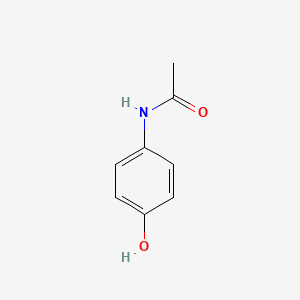

In [19]:
import urllib.request
from IPython.display import Image, display

def get_2d_image_url(cid):
    base_url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/PNG"
    url = base_url.format(cid)
    return url

def display_2d_image(cid):
    image_url = get_2d_image_url(cid)
    image = Image(urllib.request.urlopen(image_url).read())
    display(image)

def get_chemical_name(cid):
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/property/IUPACName/txt".format(cid)
    response = urllib.request.urlopen(url)
    chemical_name = response.read().decode("utf-8").strip()
    return chemical_name

def get_synonyms(cid):
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/synonyms/TXT".format(cid)
    response = urllib.request.urlopen(url)
    synonyms = response.read().decode("utf-8").strip().split("\n")
    return synonyms

# Example usage
cid = 1983      # Example CID
chemical_name = get_chemical_name(cid)
print("Chemical Name:", chemical_name)
synonyms = get_synonyms(cid)
print("Brand Names:", synonyms)
print("Visualization of Drug structure:")
display_2d_image(cid)

In [20]:
# SMILES of drug (should be listed)
drugs = [get_smiles_from_cid(1983)]
# drugs=["Cc1c2n3c(c1CCC(=O)O)C=C4C(=C(C5=[n]4[Fe]36[n]7=C(C=C8N6C(=C5)C(=C8C)C=C)C(=C(C7=C2)C)C=C)C)CCC(=O)O"]
print("SMILES of the drug:", drugs[0])

SMILES of the drug: CC(=O)NC1=CC=C(C=C1)O


In [21]:
# Sequences (should be listed)
targets = [get_seq_from_uniprot_acc("Q8NER1")]
# targets=["QTDVIAQRKAILKQMGEATKPIAAMLKGEAKFDQAVVQKSLAAIADDSKKLPALFPADSKTGGDTAALPKIWEDKAKFDDLFAKLAAAATAAQGTIKDEASLKANIGGVLGNCKSCHDDFRAKKS"]
# targets=["QTHVIAQRKAILHQMGEATHPIAAMLKGEAHFDQAVVQHSLAAIADDSHKLPALFPAHSKTGGDTHALPKIWHDKAKFDDLFAHLAAAATHAQGTIHDEASLKHNIGGVLGNCKSCHDDFRAKKS"]
# targets=["MEHAFTPLEPLLSTGNLKYCLVILNQPLDNYFRHLWNKALLRACADGGANRLYDITEGERESFLPEFINGDFDSIRPEVREYYATKGCELISTPDQDHTDFTKCLKMLQKKIEEKDLKVDVIVTLGGLAGRFDQIMASVNTLFQATHITPFPIIIIQEESLIYLLQPGKHRLHVDTGMEGDWCGLIPVGQPCMQVTTTGLKWNLTNDVLAFGTLVSTSNTYDGSGVVTVETDHPLLWTMAIKS"]

In [22]:
print((targets[0]))

MKKWSSTDLGAAADPLQKDTCPDPLDGDPNSRPPPAKPQLSTAKSRTRLFGKGDSEEAFPVDCPHEEGELDSCPTITVSPVITIQRPGDGPTGARLLSQDSVAASTEKTLRLYDRRSIFEAVAQNNCQDLESLLLFLQKSKKHLTDNEFKDPETGKTCLLKAMLNLHDGQNTTIPLLLEIARQTDSLKELVNASYTDSYYKGQTALHIAIERRNMALVTLLVENGADVQAAAHGDFFKKTKGRPGFYFGELPLSLAACTNQLGIVKFLLQNSWQTADISARDSVGNTVLHALVEVADNTADNTKFVTSMYNEILMLGAKLHPTLKLEELTNKKGMTPLALAAGTGKIGVLAYILQREIQEPECRHLSRKFTEWAYGPVHSSLYDLSCIDTCEKNSVLEVIAYSSSETPNRHDMLLVEPLNRLLQDKWDRFVKRIFYFNFLVYCLYMIIFTMAAYYRPVDGLPPFKMEKTGDYFRVTGEILSVLGGVYFFFRGIQYFLQRRPSMKTLFVDSYSEMLFFLQSLFMLATVVLYFSHLKEYVASMVFSLALGWTNMLYYTRGFQQMGIYAVMIEKMILRDLCRFMFVYIVFLFGFSTAVVTLIEDGKNDSLPSESTSHRWRGPACRPPDSSYNSLYSTCLELFKFTIGMGDLEFTENYDFKAVFIILLLAYVILTYILLLNMLIALMGETVNKIAQESKNIWKLQRAITILDTEKSFLKCMRKAFRSGKLLQVGYTPDGKDDYRWCFRVDEVNWTTWNTNVGIINEDPGNCEGVKRTLSFSLRSSRVSGRHWKNFALVPLLREASARDRQSAQPEEVYLRQFSGSLKPEDAEVFKSPAASGEK


In [23]:
drugs_fp = [compound_encoder.encode(drug) for drug in drugs]
targets_encoded = [protein_encoder.encode(target) for target in targets]

In [24]:
print((targets_encoded))

[[11, 18, 18, 6, 12, 12, 13, 14, 3, 19, 1, 1, 1, 14, 20, 3, 10, 18, 14, 13, 9, 20, 14, 20, 3, 14, 19, 14, 20, 8, 12, 16, 20, 20, 20, 1, 18, 20, 10, 3, 12, 13, 1, 18, 12, 16, 13, 16, 3, 5, 19, 18, 19, 14, 12, 15, 15, 1, 5, 20, 4, 14, 9, 20, 17, 15, 15, 19, 15, 3, 14, 12, 9, 20, 13, 2, 13, 4, 12, 20, 4, 2, 13, 2, 10, 16, 20, 19, 14, 19, 20, 13, 19, 1, 16, 3, 3, 12, 10, 14, 12, 4, 1, 1, 12, 13, 15, 18, 13, 3, 16, 3, 7, 14, 16, 16, 12, 2, 5, 15, 1, 4, 1, 10, 8, 8, 9, 10, 14, 3, 15, 12, 3, 3, 3, 5, 3, 10, 18, 12, 18, 18, 17, 3, 13, 14, 8, 15, 5, 18, 14, 20, 15, 13, 19, 18, 13, 9, 3, 3, 18, 1, 11, 3, 8, 3, 17, 14, 19, 10, 8, 13, 13, 2, 20, 3, 3, 3, 15, 2, 1, 16, 10, 13, 14, 12, 3, 18, 15, 3, 4, 8, 1, 12, 7, 13, 14, 12, 7, 7, 18, 19, 10, 13, 1, 3, 17, 2, 1, 2, 15, 16, 16, 8, 11, 1, 3, 4, 13, 3, 3, 4, 15, 8, 19, 1, 14, 4, 10, 1, 1, 1, 17, 19, 14, 5, 5, 18, 18, 13, 18, 19, 16, 20, 19, 5, 7, 5, 19, 15, 3, 20, 3, 12, 3, 1, 1, 9, 13, 8, 10, 3, 19, 2, 4, 18, 5, 3, 3, 10, 8, 12, 6, 10, 13, 1, 14, 2,

In [25]:
protein_encoder = ProteinEncoder(prot_vec)
target_encoded = protein_encoder.pad(targets_encoded)

In [26]:
print(target_encoded[0][0:300])

[11 18 18  6 12 12 13 14  3 19  1  1  1 14 20  3 10 18 14 13  9 20 14 20
  3 14 19 14 20  8 12 16 20 20 20  1 18 20 10  3 12 13  1 18 12 16 13 16
  3  5 19 18 19 14 12 15 15  1  5 20  4 14  9 20 17 15 15 19 15  3 14 12
  9 20 13  2 13  4 12 20  4  2 13  2 10 16 20 19 14 19 20 13 19  1 16  3
  3 12 10 14 12  4  1  1 12 13 15 18 13  3 16  3  7 14 16 16 12  2  5 15
  1  4  1 10  8  8  9 10 14  3 15 12  3  3  3  5  3 10 18 12 18 18 17  3
 13 14  8 15  5 18 14 20 15 13 19 18 13  9  3  3 18  1 11  3  8  3 17 14
 19 10  8 13 13  2 20  3  3  3 15  2  1 16 10 13 14 12  3 18 15  3  4  8
  1 12  7 13 14 12  7  7 18 19 10 13  1  3 17  2  1  2 15 16 16  8 11  1
  3  4 13  3  3  4 15  8 19  1 14  4 10  1  1  1 17 19 14  5  5 18 18 13
 18 19 16 20 19  5  7  5 19 15  3 20  3 12  3  1  1  9 13  8 10  3 19  2
  4 18  5  3  3 10  8 12  6 10 13  1 14  2 12  1 16 14 12  4 19  8 13  4
  3 17  1  3  4 15  4  1 14  8 13  1]


In [27]:
br_predictions = br_model.HoTS_prediction(drugs_fp, target_encoded)

In [28]:
print(br_predictions[0])

[[0.5024931]]


### Visualization of protein residues

In [29]:
def BR_sequence_prediction_test(br_prediction):
    for i in range(len(br_prediction)):
        for j in range(2):
            string = targets[i]
            start_index = br_prediction[i][j][0]
            end_index =  br_prediction[i][j][1]
            highlighted_string = ('\033[1;37m' + string[:start_index] + '\033[0m' +
                                '\033[1;32m' + string[start_index:end_index+1] + '\033[0m' +
                                '\033[1;37m' + string[end_index+1:] + '\033[0m')
            max_line_length = 150
            output_lines = [highlighted_string[i:i+max_line_length] for i in range(0, len(highlighted_string), max_line_length)]
            output_string = '\n'.join(output_lines)
        
            s=targets[i][br_prediction[i][j][0] : br_prediction[i][j][1]+1]
            print("\nSequence: ",output_string)   
            print("\nPredicted Sequence: ",s)
            print("\nPrediction Score: ",br_prediction[i][j][2])
            print("\n")


In [30]:
BR_sequence_prediction_test(br_predictions[1])
print("\nChemical formula: ",drugs[0])
print("\nDrug name: ",synonyms[0])
print("\nDTI-Score: ",br_predictions[0][0])


Sequence:  MKKWSSTDLGAAADPLQKDTCPDPLDGDPNSRPPPAKPQLSTAKSRTRLFGKGDSEEAFPVDCPHEEGELDSCPTITVSPVITIQRPGDGPTGARLLSQDSVAASTEKTLRLYDRRSIFEAVAQNNCQDLESLLLFLQKSKKH
LTDNEFKDPETGKTCLLKAMLNLHDGQNTTIPLLLEIARQTDSLKELVNASYTDSYYKGQTALHIAIERRNMALVTLLVENGADVQAAAHGDFFKKTKGRPGFYFGELPLSLAACTNQLGIVKFLLQNSWQTADISARDSVGNTVLHALV
EVADNTADNTKFVTSMYNEILMLGAKLHPTLKLEELTNKKGMTPLALAAGTGKIGVLAYILQREIQEPECRHLSRKFTEWAYGPVHSSLYDLSCIDTCEKNSVLEVIAYSSSETPNRHDMLLVEPLNRLLQDKWDRFVKRIFYFNFLVYC
LYMIIFTMAAYYRPVDGLPPFKMEKTGDYFRVTGEILSVLGGVYFFFRGIQYFLQRRPSMKTLFVDSYSEMLFFLQSLFMLATVVLYFSHLKEYVASMVFSLALGWTNMLYYTRGFQQMGIYAVMIEKMILRDLCRFMFVYIVFL
FGFSTAVVTLIEDGKNDSLPSESTSHRWRGPACRPPDSSYNSLYSTCLELFKFTIGMGDLEFTENYDFKAVFIILLLAYVILTYILLLNMLIALMGETVNKIAQESKNIWKLQRAITILDTEKSFLKCMRKAF
RSGKLLQVGYTPDGKDDYRWCFRVDEVNWTTWNTNVGIINEDPGNCEGVKRTLSFSLRSSRVSGRHWKNFALVPLLREASARDRQSAQPEEVYLRQFSGSLKPEDAEVFKSPAASGEK

Predicted Sequence:  FGFSTAVVTLIEDG

Prediction Score:  0.6272644400596619



Sequence:  MKKWSSTDLGAAADPLQKDTCPDPLDGDPNSRPPPAKPQLSTAKSRTRLFGK

## DTI prediction

In [31]:
dti_prediction_results = br_model.DTI_prediction(drugs_fp, targets_encoded)

In [32]:
print(dti_prediction_results)

[[0.5024931]]
